In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator
from cycler import cycler
import yaml
from scipy.interpolate import interp1d

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
FIG_WIDTH = 3.4 #8.636 cm

In [3]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [5]:
abs_coef_Si_data=pd.read_excel('./data/abs_coef_silicon.xlsx')
abs_coef_Si=(1240/np.array(abs_coef_Si_data['lambda']), np.array(abs_coef_Si_data['alfa_25C']))
abs_coef_GaAs_data=pd.read_excel('./data/abs_coef_GaAs.xlsx')
abs_coef_GaAs=(1240/np.array(abs_coef_GaAs_data['Wavelength (nm)']), np.array(abs_coef_GaAs_data['alpha (cm-1)']))

ac_interp_Si = interp1d(abs_coef_Si[0], abs_coef_Si[1]) # in cm-1

def absorption(alpha, d): #alpha in cm-1, d in um
    return 1-np.exp(-alpha*d*1e-4)

/home/inigo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  


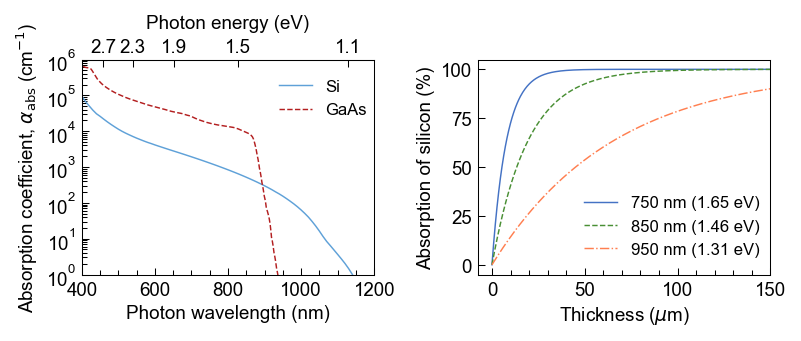

In [25]:
fig = plt.figure(figsize=(1.6*FIG_WIDTH, 0.7*FIG_WIDTH), dpi=DPI_PLOT)
ax = fig.add_subplot(121)

ax.plot(1240/abs_coef_Si[0], abs_coef_Si[1], c=colors['color1'], label='Si')
ax.plot(1240/abs_coef_GaAs[0], abs_coef_GaAs[1], '--', c=colors['color2'], label='GaAs')
ax.set_yscale('log')
ax.set_ylim(1, 1e6)
ax.set_xlim(400, 1200)
ax.set_xlabel('Photon wavelength (nm)')
ax.set_ylabel(r'Absorption coefficient, $\alpha_{\mathrm{abs}}$ (cm$^{-1}$)')
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(LogLocator(base=10, numticks=8))
ax.yaxis.set_minor_locator(LogLocator(base=10, subs=np.linspace(0.2,0.9,8),
                                              numticks=8))
def nm2eV(x):
    return 1240/x

def eV2nm(x):
    return nm2eV(x)

secax = ax.secondary_xaxis('top', functions=(nm2eV, eV2nm))
secax.set_xticks(np.array([1.1, 1.5, 1.9, 2.3, 2.7]))
secax.set_xlabel('Photon energy (eV)', labelpad=5)
secax.tick_params('x', pad=1.5)

ax.legend(loc=[0.65, 0.7])
#-------------------------------
ax2 = fig.add_subplot(122)

thickness =np.linspace(0, 150, 500) # um
low = 1240/750 #eV
med = 1240/850 #eV
high = 1240/950 #eV

ax2.plot(thickness, [100*absorption(ac_interp_Si(low), t) for t in thickness], '-',c=colors['color9'], label=r'%d nm (%.2f eV)' % (1240/low, low))
ax2.plot(thickness, [100*absorption(ac_interp_Si(med), t) for t in thickness], '--', c=colors['color3'], label='%d nm (%.2f eV)' % (1240/med, med))
ax2.plot(thickness, [100*absorption(ac_interp_Si(high), t) for t in thickness], '-.', c=colors['color15'], label='%d nm (%.2f eV)' % (1240/high, high))
ax2.set_yscale('linear')
ax2.set_xlabel(r'Thickness ($\mu$m)')
ax2.set_ylabel('Absorption of silicon (%)')
ax2.set_ylim(None, 105)
ax2.set_xlim(None, 150)
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.legend(loc=[0.34, 0.05])
#-------------------------------
plt.tight_layout()

#plt.savefig ('./abs_coef.png', dpi=DPI_SAVE)